In [1]:
from os import path

import numpy as np

import itk

import site
site.addsitedir("../ARGUS")

from ARGUS_Timing import *
from ARGUS_IO import *

from ARGUS_ptx_ar import ARGUS_ptx_ar

In [2]:
ptx_ai = ARGUS_ptx_ar(config_file_name="../ARGUS/ARGUS_ptx_ar.cfg", network_name="final", device_num=0)

monai.networks.nets.unet UNet.__init__:dimensions: Argument `dimensions` has been deprecated since version 0.6. Please use `spatial_dims` instead.


In [3]:
ptx_ai.load_model(0, "Results/ptx_vfold_run0/best_model_0.pth")
ptx_ai.load_model(1, "Results/ptx_vfold_run0/best_model_1.pth")
ptx_ai.load_model(2, "Results/ptx_vfold_run0/best_model_2.pth")

In [4]:
vid = ARGUS_load_video("Data_PTX/original/BAMC-PTXNoSliding/025ns_Image_262499828648_clean.mp4")

In [5]:
print(vid.shape)

(68, 1080, 1920)


In [6]:
ptx_ai.preprocess(vid)

(68, 320, 320)
32 67
input array scales shape = (35, 320, 320)


(12, 320, 320)
12


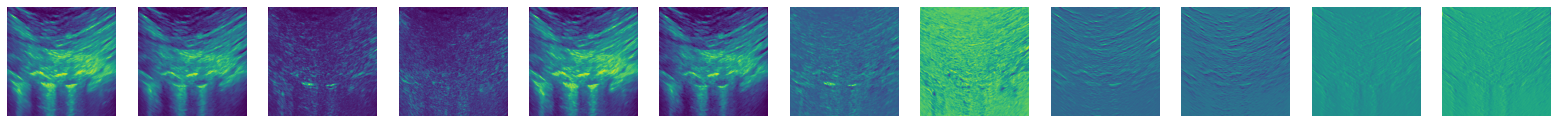

In [7]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

img = ptx_ai.input_tensor[0][0]
print(img.shape)
num_channels = img.shape[0]
print(num_channels)
plt.figure(figsize=[30, 30])
for c in range(num_channels):
    plt.subplot(
        2,
        num_channels + 1,
        (num_channels + 1) + c + 1,
    )
    plt.axis('off')
    plt.imshow(rotate(img[c, :, :],270))
plt.show()

In [8]:
labels = ptx_ai.inference()

(1, 3, 320, 320)
Iterations to optimize prior = 0
(1, 3, 320, 320)
Iterations to optimize prior = 0
(1, 3, 320, 320)
Iterations to optimize prior = 0
Iterations to optimize prior = 0


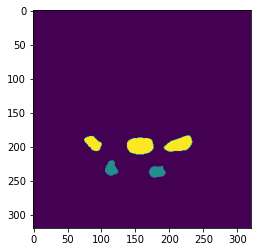

In [9]:
plt.imshow(rotate(labels,270))